## 2 main goals of this analysis 

1. Compare reviews that were left without developers' responses and those that were answered. Check the ratio of reviews' changed afterward.  
2. Train a model that would predict reviews star (1-5) based on comments context. Sentiment analysis. 

In [309]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt


Getting all CSV files into one DataFrame

In [310]:
# Specify the directory where CSV files are located
directory_path = '/Users/mac/Spiced/Projects/reveiws-prediction/data/'

# Use the glob module to get a list of all CSV files in the specified directory
csv_files = glob.glob(directory_path + '*.csv')

# Initialize an empty list to store DataFrames
data_frames = []

# Iterate through the list of CSV files and read each into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    data_frames.append(df)

# Concatenate all DataFrames along the rows (axis=0)
combined_data = pd.concat(data_frames, axis=0, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('//Users/mac/Spiced/Projects/reveiws-prediction/combined.csv', index=False)


In [311]:
df = pd.read_csv('combined.csv')
df

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
0,com.nick.memasik,NaN,NaN,es,surnia_umts,2018-12-01T00:00:54Z,1543622454139,2018-12-01T00:00:54Z,1543622454139,5,NaN,NaN,NaN,NaN,NaN,NaN
1,com.nick.memasik,95.0,3.0.1,es,cs02ve3gss,2018-12-01T00:25:28Z,1543623928849,2018-12-01T00:25:49Z,1543623949604,3,NaN,Ehhh.......,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
2,com.nick.memasik,95.0,3.0.1,es,j7xelte,2018-12-01T02:30:39Z,1543631439053,2018-12-01T02:32:07Z,1543631527535,5,NaN,Esta aplicación esta padrisima ojala que asi f...,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
3,com.nick.memasik,95.0,3.0.1,es,E1M,2018-12-01T02:40:37Z,1543632037870,2018-12-01T02:41:12Z,1543632072218,5,NaN,Muy divertida,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
4,com.nick.memasik,95.0,3.0.1,es,judyln,2018-12-01T03:12:48Z,1543633968769,2018-12-01T03:12:55Z,1543633975304,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62370,com.nick.memasik,NaN,NaN,ar,hwY635,2018-09-30T21:12:47Z,1538341967638,2018-09-30T21:12:52Z,1538341972314,3,NaN,NaN,NaN,NaN,NaN,NaN
62371,com.nick.memasik,90.0,2.1,es,grandprimevelteltn,2018-09-30T21:43:03Z,1538343783391,2018-09-30T21:43:25Z,1538343805498,1,NaN,Es un ascoo,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
62372,com.nick.memasik,90.0,2.1,es,a5xelte,2018-09-30T22:03:41Z,1538345021089,2018-09-30T22:03:41Z,1538345021089,3,NaN,NaN,NaN,NaN,NaN,NaN
62373,com.nick.memasik,90.0,2.1,es,hwG610-U15,2018-09-30T22:29:47Z,1538346587066,2018-09-30T22:30:26Z,1538346626461,5,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
df.shape

(62375, 16)

In [313]:
df.duplicated().value_counts()

False    62375
Name: count, dtype: int64

In [314]:
df.dtypes

Package Name                              object
App Version Code                         float64
App Version Name                          object
Reviewer Language                         object
Device                                    object
Review Submit Date and Time               object
Review Submit Millis Since Epoch           int64
Review Last Update Date and Time          object
Review Last Update Millis Since Epoch      int64
Star Rating                                int64
Review Title                              object
Review Text                               object
Developer Reply Date and Time             object
Developer Reply Millis Since Epoch       float64
Developer Reply Text                      object
Review Link                               object
dtype: object

In [315]:
df['App Version Code'].unique()

array([ nan,  95.,  92.,  91.,  81.,  90.,  74.,  98.,  99.,  97., 205.,
       203., 206., 196., 185., 198., 191.,  73.,  68., 111., 103., 100.,
       113., 102., 179., 184., 183., 153., 176., 178., 186., 180., 161.,
       129., 136., 151., 172., 120., 173., 189., 190., 195., 144., 164.,
       197., 148., 132.,  77., 131., 135., 122., 139., 142., 143., 265.,
       251., 261., 236., 248., 309., 303., 234., 231., 223., 233., 175.,
       227., 213.,  53.,  70.,  72., 201., 210., 212., 182., 116., 117.,
       118., 125., 128., 130., 158., 168., 241., 263., 308., 240., 244.,
       257., 202., 177., 170.,  31., 230., 217.,  86., 146., 147., 150.,
       106., 107., 105., 108., 109., 110., 162., 225., 226., 214., 156.,
       167., 127., 216., 302.,   8.,  10.,  11.,  17.,  12.,  18.,  21.,
        23.,  24.,  25.,  27.,  29.,   7.,  36., 215., 220., 221., 239.,
       254., 255., 259., 260.,  35.,  45.,  50., 242., 243., 152., 157.,
       160.,  84.,  89.])

### English language reviews
Filterring by EN language, to see the ratio from all reviews 

In [316]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/mac/Spiced/Projects/reveiws-prediction/combined_data.csv')

# Define your criteria (replace 'column_name' and 'desired_value' with your actual column and value)
criteria = (df['Reviewer Language'] == 'en')

# Use the criteria to filter the DataFrame
eng_df = df[criteria]

# Print the filtered DataFrame
#print(filtered_df)

In [317]:
df_eng_ratio = (len(eng_df)/len(df))
print(f"The ratio of eng reviews to the original DataFrame is: {df_eng_ratio:.2%}")


The ratio of eng reviews to the original DataFrame is: 9.26%


### Missing values

In [318]:
missing_values_per_column = df.isnull().sum()
missing_values_per_column


Package Name                                 0
App Version Code                         20216
App Version Name                         20216
Reviewer Language                            0
Device                                       9
Review Submit Date and Time                  0
Review Submit Millis Since Epoch             0
Review Last Update Date and Time             0
Review Last Update Millis Since Epoch        0
Star Rating                                  0
Review Title                             62372
Review Text                              27049
Developer Reply Date and Time            49146
Developer Reply Millis Since Epoch       49146
Developer Reply Text                     49146
Review Link                              27048
dtype: int64

In [319]:
total_rows = len(df)

missing_values_review = df['Review Text'].isnull().sum()

missing_values_reply = df['Developer Reply Text'].isnull().sum()

missing_reviews = (missing_values_review/total_rows)* 100
print('Missing text reviews values:', round(missing_reviews),'%')

missing_reviews = (missing_values_reply/total_rows)* 100
print('Missing dev replies values:', round(missing_reviews),'%')

Missing text reviews values: 43 %
Missing dev replies values: 79 %


### Droping values

* 'Review Title' column drop - there is no values at all
* 'Review Text' missing value rows drop - there is no sence as we need comments for our next analysis 
* 'Review Link' and partly 'Developer Reply Text' must be eliminated as there is no meaning in them without 'Review Text'

In [320]:
df.drop('Review Title', axis=1, inplace=True)

In [321]:
df.dropna(subset=['Review Text'], inplace=True)

In [322]:
df.shape

(35326, 15)

In [323]:
missing_values_per_column = df.isnull().sum()
missing_values_per_column

Package Name                                 0
App Version Code                          9439
App Version Name                          9439
Reviewer Language                            0
Device                                       7
Review Submit Date and Time                  0
Review Submit Millis Since Epoch             0
Review Last Update Date and Time             0
Review Last Update Millis Since Epoch        0
Star Rating                                  0
Review Text                                  0
Developer Reply Date and Time            22097
Developer Reply Millis Since Epoch       22097
Developer Reply Text                     22097
Review Link                                  0
dtype: int64

### Filling missing values with the closest non-null value

In [324]:
df['App Version Code'].fillna(method='ffill', inplace=True)
df['App Version Name'].fillna(method='ffill', inplace=True)
df['Device'].fillna(method='ffill', inplace=True)

In [325]:
df

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
1,com.nick.memasik,95.0,3.0.1,es,cs02ve3gss,2018-12-01T00:25:28Z,1543623928849,2018-12-01T00:25:49Z,1543623949604,3,Ehhh.......,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
2,com.nick.memasik,95.0,3.0.1,es,j7xelte,2018-12-01T02:30:39Z,1543631439053,2018-12-01T02:32:07Z,1543631527535,5,Esta aplicación esta padrisima ojala que asi f...,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
3,com.nick.memasik,95.0,3.0.1,es,E1M,2018-12-01T02:40:37Z,1543632037870,2018-12-01T02:41:12Z,1543632072218,5,Muy divertida,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
7,com.nick.memasik,95.0,3.0.1,ru,j5xnlte,2018-12-01T04:46:17Z,1543639577564,2018-12-01T04:46:42Z,1543639602166,5,Осень крутой автор,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
8,com.nick.memasik,95.0,3.0.1,es,P817F01,2018-12-01T04:59:02Z,1543640342497,2018-12-01T04:59:48Z,1543640388950,3,Esta mas chido que Pou Xp,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62365,com.nick.memasik,90.0,2.1,ru,BQS-5020,2018-09-30T18:26:27Z,1538331987882,2018-09-30T18:26:59Z,1538332019750,1,Оцтой,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
62366,com.nick.memasik,90.0,2.1,ru,j1xlte,2018-09-30T18:55:56Z,1538333756273,2018-09-30T18:56:23Z,1538333783777,5,Чётка мигра,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
62367,com.nick.memasik,90.0,2.1,ru,M5c,2018-09-30T19:00:44Z,1538334044944,2018-09-30T19:01:07Z,1538334067980,3,КЕк,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
62371,com.nick.memasik,90.0,2.1,es,grandprimevelteltn,2018-09-30T21:43:03Z,1538343783391,2018-09-30T21:43:25Z,1538343805498,1,Es un ascoo,NaN,NaN,NaN,http://play.google.com/console/developers/4768...


### 1. Comparing reviews that were left without developers' responses and those that were answered.


In [326]:
# Filter rows where the review was updated and the update time is higher than the submission time
updated_reviews_df = df[df['Review Last Update Millis Since Epoch'] > df['Review Submit Millis Since Epoch']]

# Filter rows where there was a developer response
developer_response_df = df.dropna(subset=['Developer Reply Text'])

# Filter rows where there was a developer response and the review was updated
updated_with_response_df = df[df['Developer Reply Text'].notna() & (df['Review Last Update Millis Since Epoch'] > df['Review Submit Millis Since Epoch'])]

# Calculate ratios
total_reviews = len(df)
total_updated_reviews = len(updated_reviews_df)
total_response_reviews = len(developer_response_df)
total_updated_with_response_reviews = len(updated_with_response_df)

# Calculate ratios
ratio_updated_with_response = total_updated_with_response_reviews / total_updated_reviews
ratio_updated_without_response = (total_updated_reviews - total_updated_with_response_reviews) / total_updated_reviews

# Display the ratios
print(f"Ratio of updated reviews with developer response: {ratio_updated_with_response:.2%}")
print(f"Ratio of updated reviews without developer response: {ratio_updated_without_response:.2%}")

Ratio of updated reviews with developer response: 24.61%
Ratio of updated reviews without developer response: 75.39%


We can see that updated reviews that got responses from developers almost two times more. \
But, we don't khow weather they increased star numbers they inicialy submited, or decresed. \ 

What could miss the scenario when: User leave 5 stars review, then developer thanks him, and during some time user faces with a problem and decreases his star from 5 to 3 or even 1 for example. \
In the example above considered such case as positive, as we don't have information about stars change history. 

In [327]:
low_stars_df = df[df['Star Rating'] <= 5]
low_stars_df.shape

(35326, 15)

In [328]:
low_stars_df

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
1,com.nick.memasik,95.0,3.0.1,es,cs02ve3gss,2018-12-01T00:25:28Z,1543623928849,2018-12-01T00:25:49Z,1543623949604,3,Ehhh.......,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
2,com.nick.memasik,95.0,3.0.1,es,j7xelte,2018-12-01T02:30:39Z,1543631439053,2018-12-01T02:32:07Z,1543631527535,5,Esta aplicación esta padrisima ojala que asi f...,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
3,com.nick.memasik,95.0,3.0.1,es,E1M,2018-12-01T02:40:37Z,1543632037870,2018-12-01T02:41:12Z,1543632072218,5,Muy divertida,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
7,com.nick.memasik,95.0,3.0.1,ru,j5xnlte,2018-12-01T04:46:17Z,1543639577564,2018-12-01T04:46:42Z,1543639602166,5,Осень крутой автор,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
8,com.nick.memasik,95.0,3.0.1,es,P817F01,2018-12-01T04:59:02Z,1543640342497,2018-12-01T04:59:48Z,1543640388950,3,Esta mas chido que Pou Xp,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62365,com.nick.memasik,90.0,2.1,ru,BQS-5020,2018-09-30T18:26:27Z,1538331987882,2018-09-30T18:26:59Z,1538332019750,1,Оцтой,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
62366,com.nick.memasik,90.0,2.1,ru,j1xlte,2018-09-30T18:55:56Z,1538333756273,2018-09-30T18:56:23Z,1538333783777,5,Чётка мигра,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
62367,com.nick.memasik,90.0,2.1,ru,M5c,2018-09-30T19:00:44Z,1538334044944,2018-09-30T19:01:07Z,1538334067980,3,КЕк,NaN,NaN,NaN,http://play.google.com/console/developers/4768...
62371,com.nick.memasik,90.0,2.1,es,grandprimevelteltn,2018-09-30T21:43:03Z,1538343783391,2018-09-30T21:43:25Z,1538343805498,1,Es un ascoo,NaN,NaN,NaN,http://play.google.com/console/developers/4768...


In [329]:
# Filter rows where the review was updated and the update time is higher than the submission time
updated_reviews_df = low_stars_df[low_stars_df['Review Last Update Millis Since Epoch'] != low_stars_df['Review Submit Millis Since Epoch']]

# Filter rows where there was a developer response
developer_response_df = low_stars_df.dropna(subset=['Developer Reply Text'])

# Filter rows where there was a developer response and the review was updated
updated_with_response_df = low_stars_df[low_stars_df['Developer Reply Text'].notna() & (low_stars_df['Review Last Update Millis Since Epoch'] > low_stars_df['Review Submit Millis Since Epoch'])]

# Calculate ratios
total_reviews = len(low_stars_df)
total_updated_reviews = len(updated_reviews_df)
total_response_reviews = len(developer_response_df)
total_updated_with_response_reviews = len(updated_with_response_df)

# Calculate ratios
ratio_updated_with_response = total_updated_with_response_reviews / total_updated_reviews
ratio_updated_without_response = (total_updated_reviews - total_updated_with_response_reviews) / total_updated_reviews

# Display the ratios
print(f"Ratio of updated reviews with developer response: {ratio_updated_with_response:.2%}")
print(f"Ratio of updated reviews without developer response: {ratio_updated_without_response:.2%}")

Ratio of updated reviews with developer response: 24.60%
Ratio of updated reviews without developer response: 75.40%


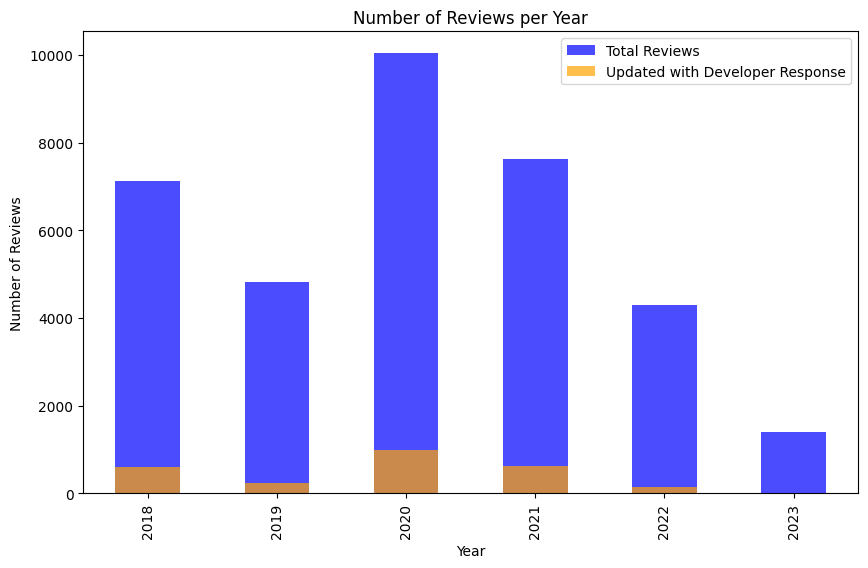

In [335]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' is your date column
# Convert the 'Date' column to datetime
low_stars_df['Review Submit Date and Time'] = pd.to_datetime(low_stars_df['Review Submit Date and Time'])

# Extract year from the 'Date' column
low_stars_df['Year'] = low_stars_df['Review Submit Date and Time'].dt.year

# Filter rows where the review was updated
updated_reviews_df = low_stars_df[low_stars_df['Review Last Update Millis Since Epoch'] != low_stars_df['Review Submit Millis Since Epoch']]

# Filter rows where there was a developer response
developer_response_df = low_stars_df.dropna(subset=['Developer Reply Text'])

# Filter rows where there was a developer response and the review was updated
updated_with_response_df = low_stars_df[
    low_stars_df['Developer Reply Text'].notna() & 
    (low_stars_df['Review Last Update Millis Since Epoch'] > low_stars_df['Review Submit Millis Since Epoch'])
]

# Group by year and count the number of reviews for each group
total_reviews_per_year = low_stars_df.groupby('Year').size()
total_updated_reviews_per_year = updated_reviews_df.groupby('Year').size()
total_response_reviews_per_year = developer_response_df.groupby('Year').size()
total_updated_with_response_reviews_per_year = updated_with_response_df.groupby('Year').size()

# Plotting
plt.figure(figsize=(10, 6))
total_reviews_per_year.plot(label='Total Reviews', kind='bar', color='blue', alpha=0.7)
total_updated_with_response_reviews_per_year.plot(label='Updated with Developer Response', kind='bar', color='orange', alpha=0.7)

plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


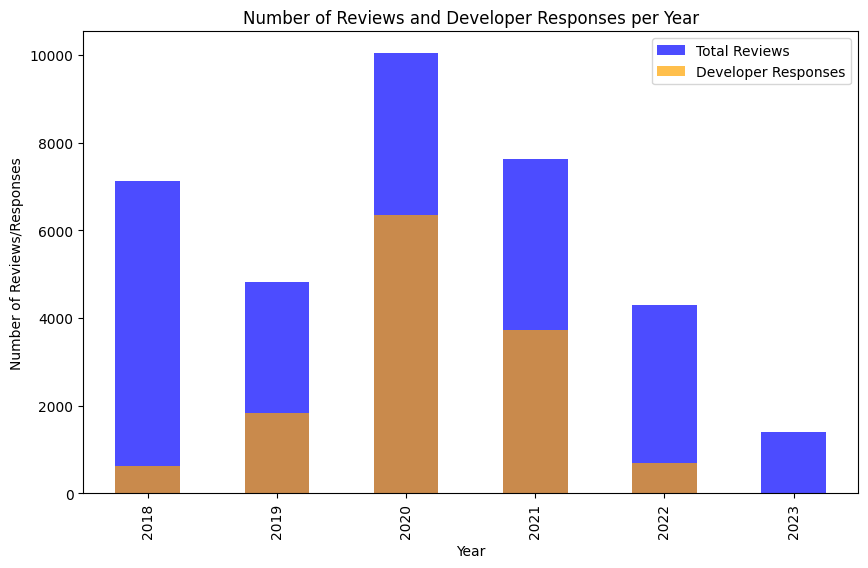

In [336]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Review Submit Date and Time' is your date column
# Convert the 'Review Submit Date and Time' column to datetime
df['Review Submit Date and Time'] = pd.to_datetime(df['Review Submit Date and Time'])

# Extract year from the 'Review Submit Date and Time' column
df['Year'] = df['Review Submit Date and Time'].dt.year

# Filter rows where there was a developer response
developer_response_df = df.dropna(subset=['Developer Reply Text'])

# Group by year and count the number of reviews and developer responses for each group
total_reviews_per_year = df.groupby('Year').size()
total_responses_per_year = developer_response_df.groupby('Year').size()

# Plotting
plt.figure(figsize=(10, 6))
total_reviews_per_year.plot(label='Total Reviews', kind='bar', color='blue', alpha=0.7)
total_responses_per_year.plot(label='Developer Responses', kind='bar', color='orange', alpha=0.7)

plt.title('Number of Reviews and Developer Responses per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews/Responses')
plt.legend()
plt.show()
